In [27]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import graphviz 
import matplotlib.pyplot as plt
from scipy.stats import expon,uniform,randint

#Sklearn imports
from sklearn import linear_model
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score,cross_val_predict,validation_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

%matplotlib inline

sensor_data=pd.read_csv('task_data.csv')
sensor_data.head()



,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,sample0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,sample1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,sample2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,sample3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,sample4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


In [28]:
sensor_data.describe()
#Results shows clean data, imputation not required, on the same scale, normalization not required

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.000000,0.523661,0.509223,0.481238,0.509752,0.497875,0.501065,0.490480,0.482372,0.482822,0.541933
std,1.001252,0.268194,0.276878,0.287584,0.297712,0.288208,0.287634,0.289954,0.282714,0.296180,0.272490
min,-1.000000,0.007775,0.003865,0.004473,0.001466,0.000250,0.000425,0.000173,0.003322,0.003165,0.000452
25%,-1.000000,0.299792,0.283004,0.235544,0.262697,0.249369,0.269430,0.226687,0.242848,0.213626,0.321264
50%,0.000000,0.534906,0.507583,0.460241,0.510066,0.497842,0.497108,0.477341,0.463438,0.462251,0.578389
75%,1.000000,0.751887,0.727843,0.734937,0.768975,0.743401,0.738854,0.735304,0.732483,0.740542,0.768990
max,1.000000,0.999476,0.998680,0.992963,0.995119,0.999412,0.997367,0.997141,0.998230,0.996098,0.999465


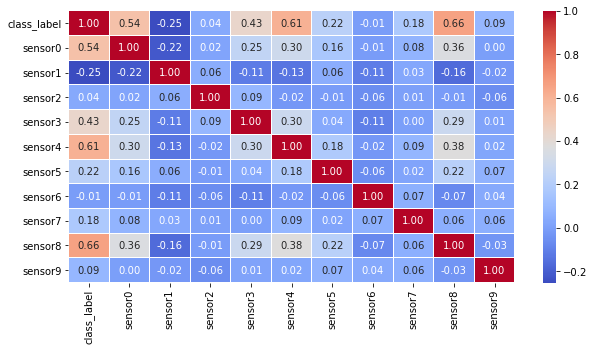

In [6]:
#Exploratory Stuff
#Correlations with the target variable
#Point Biserial Correlation since we have binary discrete target variable and continuous features

sensor_correlation=sensor_data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(sensor_correlation,xticklabels=sensor_correlation.columns.values,
            yticklabels=sensor_correlation.columns.values,annot=True,cmap="coolwarm",fmt="0.2f",linewidth=0.01)


In [29]:
#Exploratory Stuff
sensor_correlation['class_label'].sort_values(ascending=False)

NameError: name 'sensor_correlation' is not defined

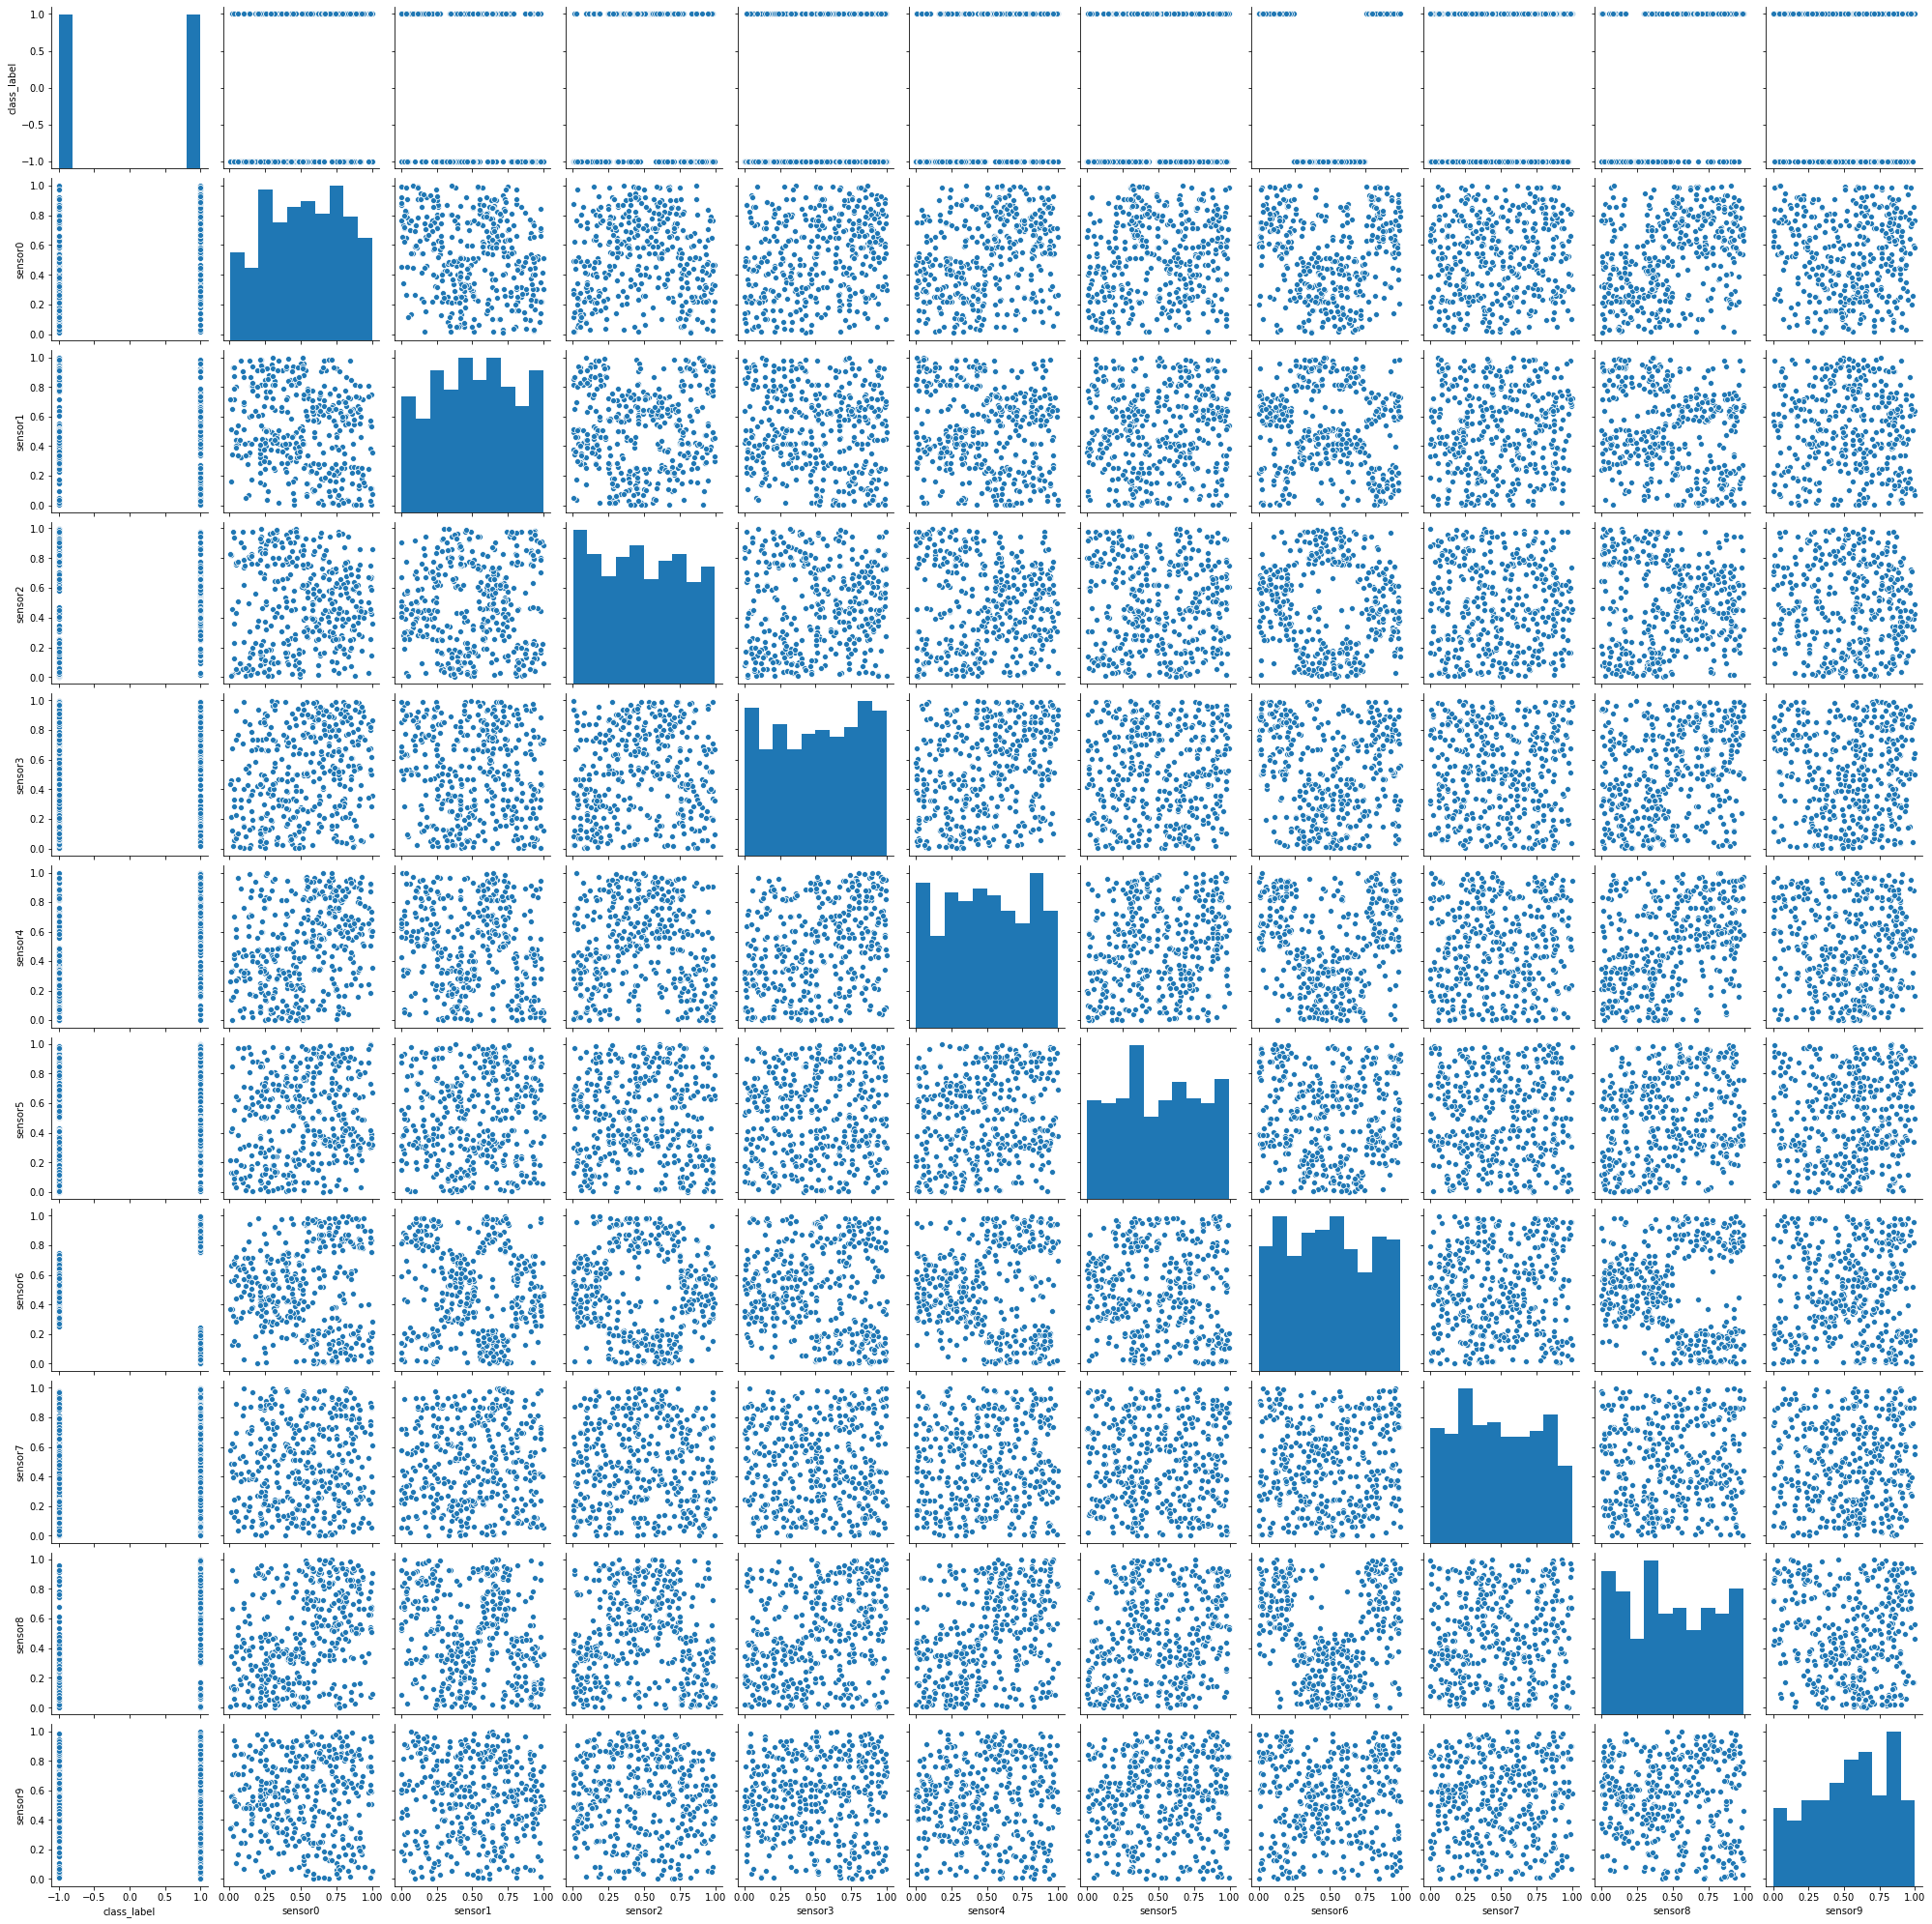

In [8]:
#Exploratory Stuff
sns.pairplot(sensor_data,palette="bright")
plt.show()

In [30]:
all_features=['sensor0','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6','sensor7','sensor8','sensor9']
y=sensor_data['class_label']
x=sensor_data[all_features]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0) #Basic train_test_split works here

print ("Shape of x_train: ", x_train.shape)
print ("Shape of y_train: ", y_train.shape)
print ("Shape of x_test: ", x_test.shape)
print ("Shape of y_test: ", y_test.shape)

#Data is well balanced between the 2 classes in both train/test
print ("\nValue counts for y_train:\n", y_train.value_counts())
print ("\nValue counts for y_test:\n", y_test.value_counts())

Shape of x_train:  (300, 10)
Shape of y_train:  (300,)
Shape of x_test:  (100, 10)
Shape of y_test:  (100,)

Value counts for y_train:
 -1.0    155
 1.0    145
Name: class_label, dtype: int64

Value counts for y_test:
  1.0    55
-1.0    45
Name: class_label, dtype: int64


In [31]:
#Checking the distribution of both train/test datasets
#Means/Std are almost the same for train.test set, they are well balanced
print ("\nx_train descriptive statistics:\n\n",x_train.agg([np.mean, np.std]))
print ("\nx_test descriptive statistics:\n\n",x_test.agg([np.mean, np.std]))


x_train descriptive statistics:

        sensor0   sensor1   sensor2   sensor3   sensor4   sensor5   sensor6  \
mean  0.511902  0.523074  0.476630  0.500287  0.499266  0.493760  0.488285   
std   0.268923  0.278430  0.290607  0.299196  0.291945  0.285576  0.286744   

       sensor7   sensor8   sensor9  
mean  0.483622  0.465155  0.558526  
std   0.282803  0.295358  0.265498  

x_test descriptive statistics:

        sensor0   sensor1   sensor2   sensor3   sensor4   sensor5   sensor6  \
mean  0.558937  0.467670  0.495063  0.538146  0.493703  0.522980  0.497067   
std   0.264187  0.269271  0.279291  0.292859  0.278085  0.294083  0.300758   

       sensor7   sensor8   sensor9  
mean  0.478621  0.535824  0.492154  
std   0.283837  0.293756  0.288140  


In [32]:
#Model Utility Functions

def classification_accuracy_report(actual,predicted):
    print ("\nAccuracy Score on Test Data: ", accuracy_score(actual,predicted))
    print ("\nConfusion Matrix on Test Data:\n", confusion_matrix(actual,predicted))
    print ("\nClassification Report on Test Data:\n",classification_report(actual,predicted))
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_test_pred)
    print ("\nROC-AUC Score: ", auc(false_positive_rate,true_positive_rate))

    
def features_rank(feature_importance_coefficients,index_labels):
    feature_importance_coefficients=map(abs,feature_importance_coefficients)
    feature_with_coeff=zip(feature_importance_coefficients,index_labels)
    print ("\nFeatures and their importances:\n", feature_with_coeff)
    ranked_features=sorted(feature_with_coeff, key=lambda x: x[0],reverse=True)
    print ("\nRanked Features:\n", [elem[1] for elem in ranked_features])
    
    
def plot_validation_curve_decision_tree(train_scores,test_scores):
    #Citation: https://datascience.stackexchange.com/questions/26955/validation-curve-differs-from-cross-val-score
    param_range=np.arange(1, 50, 5)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with Decision Tree Classifier")
    plt.xlabel("max_depth")
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    

def plot_auc_vs_hyperparameter():
    #Citation: https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3
    max_depths = np.linspace(1, 32, 32, endpoint=True)
    train_results = []
    test_results = []
    for max_depth in max_depths:
       dt = DecisionTreeClassifier(max_depth=max_depth)
       dt.fit(x_train, y_train)
       train_pred = dt.predict(x_train)
       false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
       roc_auc = auc(false_positive_rate, true_positive_rate)
       # Add auc score to previous train results
       train_results.append(roc_auc)
       y_pred = dt.predict(x_test)
       false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
       roc_auc = auc(false_positive_rate, true_positive_rate)
       # Add auc score to previous test results
       test_results.append(roc_auc)
    from matplotlib.legend_handler import HandlerLine2D
    line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
    line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('AUC score')
    plt.xlabel('Tree depth')
    plt.show()

In [33]:
#First tring out a Linear Model, Logistic Regression with SGD Optimization using ElasticNet
#ElasticNet will help us select the right l1/l2 regularization hyper-parameter
#Using RandomizedSearchCV for near optimal hyper-parameter selection
#RandomizedSearchCV is not scalable but fine with the size of our samples
#Note that our main intent is ranking the features based on the model which gives decent accuracy
#As l1 regularization may result in sparse features, l2 will help us rank the features better for the tail
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

sgd_classifier=linear_model.SGDClassifier(max_iter=8000,penalty='elasticnet',random_state=42)
param_grid={'loss':['log','hinge','modified_huber'],'alpha':expon(scale=1),'l1_ratio':uniform(0,1)}
hyper_params_search_sgd=RandomizedSearchCV(estimator=sgd_classifier,param_distributions=param_grid,n_iter=5,random_state=42)
hyper_params_search_sgd.fit(x_train,y_train)

print ("FINDING NEAR OPTIMAL HYPER-PARAMETERS USING RANDOMIZED SEARCH FOR ELASTICNET LOGISTIC REGRESSION (log loss) USING STOCHASTIC GRADIENT DESCENT OPTIMIZER")
print ("\nBest Estimator:\n",hyper_params_search_sgd.best_estimator_)

y_test_pred = hyper_params_search_sgd.predict(x_test)
classification_accuracy_report(y_test,y_test_pred)


FINDING NEAR OPTIMAL HYPER-PARAMETERS USING RANDOMIZED SEARCH FOR ELASTICNET LOGISTIC REGRESSION (log loss) USING STOCHASTIC GRADIENT DESCENT OPTIMIZER

Best Estimator:
 SGDClassifier(alpha=0.16959629191460518, l1_ratio=0.05808361216819946,
              loss='log', max_iter=8000, penalty='elasticnet', random_state=42)

Accuracy Score on Test Data:  0.87

Confusion Matrix on Test Data:
 [[40  5]
 [ 8 47]]

Classification Report on Test Data:
               precision    recall  f1-score   support

        -1.0       0.83      0.89      0.86        45
         1.0       0.90      0.85      0.88        55

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100


ROC-AUC Score:  0.8717171717171717


In [13]:
#Approach-1
#Training using Linear Model
#Model: l2 Regularized Logistic Regression (log loss) using Stochatic Gradient Descent
#Taking few hyper-parameter from the output of the best estimator given by RandomizedSearchCV
#As we do not have enough validation data, using Cross-Validation for checking overfitting
from sklearn.linear_model import SGDClassifier

sgd_classifier=linear_model.SGDClassifier(max_iter=10000,loss='log',penalty='l2',random_state=42)
scores=cross_val_score(sgd_classifier,x_train,y_train,cv=5)
print ("l2 REGULARIZED LOGISTIC REGRESSION (log loss) USING STOCHASTIC GRADIENT DESCENT OPTIMIZER\n")
print ("Cross Validation Scores on the training set: ", scores)

sgd_classifier.fit(x_train,y_train)
y_test_pred = sgd_classifier.predict(x_test)

classification_accuracy_report(y_test,y_test_pred)

coeff_list=list(itertools.chain(*sgd_classifier.coef_.tolist())) #Converting numpy array to list and then flattening
features_rank(coeff_list,all_features)

l2 REGULARIZED LOGISTIC REGRESSION (log loss) USING STOCHASTIC GRADIENT DESCENT OPTIMIZER

Cross Validation Scores on the training set:  [0.85       0.91666667 0.86666667 0.95       0.96666667]

Accuracy Score on Test Data:  0.88

Confusion Matrix on Test Data:
 [[35 10]
 [ 2 53]]

Classification Report on Test Data:
               precision    recall  f1-score   support

        -1.0       0.95      0.78      0.85        45
         1.0       0.84      0.96      0.90        55

    accuracy                           0.88       100
   macro avg       0.89      0.87      0.88       100
weighted avg       0.89      0.88      0.88       100


ROC-AUC Score:  0.8707070707070708

Features and their importances:

Ranked Features:
 ['sensor8', 'sensor4', 'sensor0', 'sensor3', 'sensor9', 'sensor7', 'sensor1', 'sensor6', 'sensor2', 'sensor5']


In [15]:
#Approach-2: Two-pass approach
#Model: l2 Regularized Logistic Regression (log loss) using Stochatic Gradient Descent (same as above)
#The above SGDClassifer model on may iterations returns Sensor8,4,0,3 as highly contributing
#However for features other than Sensor 8,4,0,3 it gives different permutations each time
#This model (Approach-2) takes the features Sensor 1,2,5,6,7 & 9 and builds another weak learner
#This weak learner tells us that features Sensor 1 & 5 are very relevant after features 8,4,0,3 predicted above

#!!!!!Refactoring required: Has to be refactored so that we can train the same model by adding/removing features.
#Variable names have been changed here (suffix _p) to make the notebook more readable and executed from any part

partial_features=['sensor1','sensor2','sensor5','sensor6','sensor7','sensor9']
y_p=sensor_data['class_label']
x_p=sensor_data[partial_features]
x_train_p,x_test_p,y_train_p,y_test_p=train_test_split(x_p,y_p,random_state=0)

sgd_classifier_p=linear_model.SGDClassifier(max_iter=10000,loss='log',penalty='l2',random_state=42)
scores=cross_val_score(sgd_classifier_p,x_train_p,y_train_p,cv=5)
print ("l2 REGULARIZED LOGISTIC REGRESSION (log loss) USING STOCHASTIC GRADIENT DESCENT OPTIMIZER\n")
print ("Cross Validation Scores on the training set: ", scores)

sgd_classifier_p.fit(x_train_p,y_train_p)
y_test_pred = sgd_classifier_p.predict(x_test_p)

classification_accuracy_report(y_test_p,y_test_pred)

coeff_list=list(itertools.chain(*sgd_classifier_p.coef_.tolist())) #Converting numpy array to list and then flattening
features_rank(coeff_list,partial_features)



l2 REGULARIZED LOGISTIC REGRESSION (log loss) USING STOCHASTIC GRADIENT DESCENT OPTIMIZER

Cross Validation Scores on the training set:  [0.58333333 0.55       0.68333333 0.63333333 0.6       ]

Accuracy Score on Test Data:  0.69

Confusion Matrix on Test Data:
 [[20 25]
 [ 6 49]]

Classification Report on Test Data:
               precision    recall  f1-score   support

        -1.0       0.77      0.44      0.56        45
         1.0       0.66      0.89      0.76        55

    accuracy                           0.69       100
   macro avg       0.72      0.67      0.66       100
weighted avg       0.71      0.69      0.67       100


ROC-AUC Score:  0.6676767676767676

Features and their importances:

Ranked Features:
 ['sensor5', 'sensor1', 'sensor9', 'sensor7', 'sensor2', 'sensor6']


In [34]:
#Approach-3
#Lets try out a Non-Linear classifier as well
#As there are 9-Dimensions there is a possibility of capturing a few relationships left by Linear Classifier
#Need to check the overfitting comprehensively here as Tree based Algorithms are prone to overfitting

print ("VANILLA DECISION TREES\n")

decision_tree=DecisionTreeClassifier()
scores=cross_val_score(decision_tree,x_train,y_train,cv=10)
print ("Cross Validation Scores on the training set: ", scores)

decision_tree=DecisionTreeClassifier(random_state=42).fit(x_train,y_train)
y_test_pred = decision_tree.predict(x_test)
classification_accuracy_report(y_test,y_test_pred)

coeff_list=decision_tree.feature_importances_
features_rank(coeff_list,all_features)



VANILLA DECISION TREES

Cross Validation Scores on the training set:  [0.96666667 1.         0.96666667 0.9        0.93333333 0.96666667
 0.93333333 0.96666667 0.93333333 0.93333333]

Accuracy Score on Test Data:  0.97

Confusion Matrix on Test Data:
 [[44  1]
 [ 2 53]]

Classification Report on Test Data:
               precision    recall  f1-score   support

        -1.0       0.96      0.98      0.97        45
         1.0       0.98      0.96      0.97        55

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100


ROC-AUC Score:  0.9707070707070706

Features and their importances:

Ranked Features:
 ['sensor8', 'sensor6', 'sensor0', 'sensor1', 'sensor7', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor9']


#Plot the Tree
#Plot Validation curves to check overfitting utilizing different hyper-parameters, max_depth, min_sample_leaf etc.

train_scores,test_scores=validation_curve(DecisionTreeClassifier(),x_train,y_train,"max_depth",param_range,cv=5)

plot_validation_curve_decision_tree(train_scores,test_scores)
plot_auc_vs_hyperparameter()

#Citation:https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
graph = Source(tree.export_graphviz(decision_tree,out_file=None,filled=True,rounded=True,special_characters=True,feature_names=x_train.columns))
SVG(graph.pipe(format='svg'))


In [23]:
#Approach-4
#Now lets try out an Ensemble
#As Decision Trees worked well without overfitting, lets see how Bagging of Decision Trees work
#The output might vary here 

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

print ("ENSEMBLE - BAGGING DECISION TREES\n")

bagging_classsifier=BaggingClassifier(DecisionTreeClassifier(),n_estimators=30,bootstrap=True,random_state=42)

scores=cross_val_score(bagging_classsifier,x_train,y_train,cv=5)
print ("Cross Validation Scores on the training set: ", scores)

bagging_classsifier.fit(x_train,y_train)

coeff_list=np.mean([tree.feature_importances_ for tree in bagging_classsifier.estimators_],axis=0)

y_test_pred = bagging_classsifier.predict(x_test)
classification_accuracy_report(y_test,y_test_pred)


ENSEMBLE - BAGGING DECISION TREES

Cross Validation Scores on the training set:  [0.98333333 0.96666667 0.98333333 0.98333333 0.91666667]

Accuracy Score on Test Data:  0.94

Confusion Matrix on Test Data:
 [[40  5]
 [ 1 54]]

Classification Report on Test Data:
               precision    recall  f1-score   support

        -1.0       0.98      0.89      0.93        45
         1.0       0.92      0.98      0.95        55

    accuracy                           0.94       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


ROC-AUC Score:  0.9353535353535354


SUMMARY 

The output (Ranked Features, high to low predictive power) from various models is summarized below 

(Kindly note that, in real life scenarios when the amount of data is limited (just like our sample problem) then Domain Knowledge plays a vital role in verifying the ranked features from various Algorithms. If we have billions of samples then sometimes the domain can be derived/explained from the model itself.)

Approach 1: Regularized Logistic Regression with Stochastic Gradient Descent as optimization and selecting the hyperparameters using Search Algorithms.

[Sensor8, Sensor4, Sensor0, Sensor3, Sensor9, Sensor7, Sensor1, Sensor6, Sensor2, Sensor5]

Approach 2: Two pass (Regularized Logistic Regression with Stochastic Gradient Descent as optimization) method 

[Sensor8, Sensor4, Sensor0, Sensor3, Sensor1, Sensor5, Sensor2, Sensor6, Sensor7, Sensor9]

Approach 3: Vanilla Decision Trees

[Sensor8, Sensor6, Sensor0, Sensor1, Sensor7, Sensor2, Sensor3, Sensor4, Sensor5, Sensor9]

Approach 4: Ensemble (Bagging)

Just tried this for some verifications, accuracies almost same as Approach 3


NOTE: All of these have been outputted above in the Notebook


FINAL OUTPUT/RANK (Selecting Approach 3 above: Vanilla Decision Trees)

Ranked List of Sensors (High to low predictive power):
    
[Sensor8, Sensor6, Sensor0, Sensor1, Sensor7, Sensor2, Sensor3, Sensor4, Sensor5, Sensor9]

Note: This has been outputted above in the notebook
